<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/Modulo2_EDA/EST_S3_DW_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling y EDA**

In [ ]:
#Importar librerias
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2022-03-10/data/listings.csv.gz', compression= 'gzip')

df.head()#solo muestra los 05 primeros
#len(df) no proporciona el numero de filas contando el titulo
#df.tail()#solo muestra los 05 últimos

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20220310203617,2022-03-11,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.92,4.75,4.38,HUTB-002062,t,22,22,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20220310203617,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.98,4.66,4.67,HUTB-005057,f,2,2,0,0,0.40
2,32711,https://www.airbnb.com/rooms/32711,20220310203617,2022-03-11,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.79,4.81,4.40,HUTB-001722,t,3,3,0,0,0.49
3,34981,https://www.airbnb.com/rooms/34981,20220310203617,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,https://www.airbnb.com/users/show/73163,...,4.66,4.70,4.44,HUTB-001506,t,2,2,0,0,1.19
4,35318,https://www.airbnb.com/rooms/35318,20220310203617,2022-03-31,Luxury room with private bathroom and balcony,"Luxury Room with King Size bed, private bathro...",The Gothic Quarter of Barcelona. One of the ol...,https://a0.muscache.com/pictures/miso/Hosting-...,152070,https://www.airbnb.com/users/show/152070,...,4.83,4.82,4.68,NaN,t,1,0,1,0,1.86


## ***Data Wrangling***

### **Descubrimiento de Datos**

In [ ]:
# ver los tipos de cada columna
df.info()#nos brinda información del datashet, el object es un string(cadena de texto)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16042 entries, 0 to 16041
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16042 non-null  int64  
 1   listing_url                                   16042 non-null  object 
 2   scrape_id                                     16042 non-null  int64  
 3   last_scraped                                  16042 non-null  object 
 4   name                                          16032 non-null  object 
 5   description                                   15955 non-null  object 
 6   neighborhood_overview                         9625 non-null   object 
 7   picture_url                                   16042 non-null  object 
 8   host_id                                       16042 non-null  int64  
 9   host_url                                      16042 non-null 

In [ ]:
#Información Estadística de los datos cuantitativos del datashet
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.604200e+04,1.604200e+04,1.604200e+04,16038.000000,16038.000000,16042.000000,16042.000000,16042.000000,0.0,15462.000000,...,11938.000000,11932.000000,11938.000000,11931.000000,11931.000000,16042.000000,16042.000000,16042.000000,16042.000000,12079.000000
mean,1.430896e+16,2.022031e+13,1.249522e+08,54.782018,54.782018,41.392016,2.166318,3.432926,NaN,1.699133,...,4.574731,4.727256,4.716510,4.738396,4.490831,17.563645,13.962598,2.967772,0.514774,1.098449
std,8.826530e+16,0.000000e+00,1.309618e+08,364.193810,364.193810,0.014835,0.019176,2.254384,NaN,1.028045,...,0.551162,0.460445,0.482635,0.397033,0.537675,32.911057,29.724607,12.650289,4.424057,1.540837
min,1.867400e+04,2.022031e+13,3.073000e+03,0.000000,0.000000,41.352608,2.055280,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.617274e+07,2.022031e+13,9.478280e+06,1.000000,1.000000,41.380490,2.156170,2.000000,NaN,1.000000,...,4.450000,4.670000,4.660000,4.670000,4.330000,1.000000,0.000000,0.000000,0.000000,0.170000
50%,3.128104e+07,2.022031e+13,6.629602e+07,3.000000,3.000000,41.389790,2.167660,3.000000,NaN,1.000000,...,4.720000,4.870000,4.860000,4.850000,4.600000,3.000000,1.000000,0.000000,0.000000,0.620000
75%,4.397521e+07,2.022031e+13,2.268047e+08,17.000000,17.000000,41.401890,2.177280,4.000000,NaN,2.000000,...,4.920000,5.000000,5.000000,5.000000,4.800000,17.000000,13.000000,1.000000,0.000000,1.570000
max,5.781858e+17,2.022031e+13,4.478488e+08,3750.000000,3750.000000,41.469480,2.232090,16.000000,NaN,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,169.000000,169.000000,101.000000,45.000000,53.850000


In [ ]:
df.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
16037,577494589934480453,https://www.airbnb.com/rooms/577494589934480453,20220310203617,2022-03-11,Bright apartment near Boqueria Market,Boqueria Plaza 22 is ideal for an unforgettabl...,Boqueria marketplace - 165 m<br />Las Ramblas ...,https://a0.muscache.com/pictures/prohost-api/H...,158023606,https://www.airbnb.com/users/show/158023606,...,NaN,NaN,NaN,Exempt,t,131,131,0,0,NaN
16038,578070925898488476,https://www.airbnb.com/rooms/578070925898488476,20220310203617,2022-03-11,Precioso apartamento en complejo residencial .,Disfruta de la sencillez de este alojamiento t...,NaN,https://a0.muscache.com/pictures/9d49c9c3-00c6...,256930974,https://www.airbnb.com/users/show/256930974,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
16039,578085064903940508,https://www.airbnb.com/rooms/578085064903940508,20220310203617,2022-03-11,Penthouse Passeig de Gracia,El Penthouse Passeig de Gracia es uno de nuest...,Nuestros apartamentos The Central Place situad...,https://a0.muscache.com/pictures/miso/Hosting-...,21726991,https://www.airbnb.com/users/show/21726991,...,NaN,NaN,NaN,NaN,f,12,12,0,0,NaN
16040,578156460344022945,https://www.airbnb.com/rooms/578156460344022945,20220310203617,2022-03-10,Navas地铁站安静双人间,周围环境安全，以当地居民为主。公寓设施齐全，生活舒适，交通便利、离地铁站几十米<br /><...,公寓距离圣家堂一公里多距离圣保罗医院800米，距离L1Navas地铁站仅仅数米,https://a0.muscache.com/pictures/miso/Hosting-...,393753518,https://www.airbnb.com/users/show/393753518,...,NaN,NaN,NaN,Exempt,t,1,0,1,0,NaN
16041,578185788972834848,https://www.airbnb.com/rooms/578185788972834848,20220310203617,2022-03-11,Loft Eixample (renovated 2022).,Small loft recently renovated (2022). Quiet an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3039107,https://www.airbnb.com/users/show/3039107,...,NaN,NaN,NaN,Exempt,f,33,33,0,0,NaN


### **Estructura de Datos**

Vamos a crear un sub-dataset que considere los siguientes atributos (columnas):


*   **id:** Airbnb's unique identifier for the listing
*   **last_scraped:** UTC. The date and time this listing was "scraped".
*   **name**: Name of the listing
*   **description**: Detailed description of the listing
*   **host_id**: Airbnb's unique identifier for the host/user
*   **host_response_time**:
*   **host_acceptance_rate**:
*   **host_is_superhost**: boolean [t=true; f=false]
*   **neighbourhood_cleansed**: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
*   **neighbourhood_group_cleansed**: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
*   **latitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
*   **longitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
*   **property_type**: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
*   **room_type**: All homes are grouped into the following three room types: Entire place, Private room, Shared room
*   **accommodates**: The maximum capacity of the listing
*   **price**: daily price in local currency
*   **number_of_reviews**: The number of reviews the listing has

In [ ]:
#sub dataframe
df2 = df[["id", "last_scraped","name","description","host_id",
          "host_response_time","host_acceptance_rate", "host_is_superhost",
          "neighbourhood_cleansed","neighbourhood_group_cleansed","latitude","longitude",
          "property_type","room_type","accommodates","price","number_of_reviews"]]
df2

,id,last_scraped,name,description,host_id,host_response_time,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews
0,18674,2022-03-11,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,71615,within an hour,89%,f,la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,$126.00,25
1,23197,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...",90417,within an hour,93%,t,el Besòs i el Maresme,Sant Martí,41.412910,2.220630,Entire rental unit,Entire home/apt,5,$220.00,53
2,32711,2022-03-11,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,135703,within an hour,100%,f,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.170150,Entire rental unit,Entire home/apt,6,$140.00,63
3,34981,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,73163,within an hour,91%,f,el Barri Gòtic,Ciutat Vella,41.379780,2.176230,Entire rental unit,Entire home/apt,9,$316.00,167
4,35318,2022-03-31,Luxury room with private bathroom and balcony,"Luxury Room with King Size bed, private bathro...",152070,within an hour,100%,f,el Barri Gòtic,Ciutat Vella,41.381700,2.177300,Private room in casa particular,Private room,2,$93.00,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,577494589934480453,2022-03-11,Bright apartment near Boqueria Market,Boqueria Plaza 22 is ideal for an unforgettabl...,158023606,within an hour,99%,f,el Raval,Ciutat Vella,41.380906,2.169385,Entire rental unit,Entire home/apt,5,$122.00,0
16038,578070925898488476,2022-03-11,Precioso apartamento en complejo residencial .,Disfruta de la sencillez de este alojamiento t...,256930974,NaN,NaN,f,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.403000,2.166390,Private room in condominium (condo),Private room,2,$29.00,0
16039,578085064903940508,2022-03-11,Penthouse Passeig de Gracia,El Penthouse Passeig de Gracia es uno de nuest...,21726991,within a few hours,27%,f,la Dreta de l'Eixample,Eixample,41.390682,2.164789,Entire condominium (condo),Entire home/apt,2,$120.00,0
16040,578156460344022945,2022-03-10,Navas地铁站安静双人间,周围环境安全，以当地居民为主。公寓设施齐全，生活舒适，交通便利、离地铁站几十米<br /><...,393753518,NaN,NaN,f,el Camp de l'Arpa del Clot,Sant Martí,41.416393,2.184852,Private room in condominium (condo),Private room,2,$29.00,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16042 entries, 0 to 16041
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            16042 non-null  int64  
 1   last_scraped                  16042 non-null  object 
 2   name                          16032 non-null  object 
 3   description                   15955 non-null  object 
 4   host_id                       16042 non-null  int64  
 5   host_response_time            12454 non-null  object 
 6   host_acceptance_rate          12849 non-null  object 
 7   host_is_superhost             16038 non-null  object 
 8   neighbourhood_cleansed        16042 non-null  object 
 9   neighbourhood_group_cleansed  16042 non-null  object 
 10  latitude                      16042 non-null  float64
 11  longitude                     16042 non-null  float64
 12  property_type                 16042 non-null  object 
 13  r

In [ ]:
len(df2)

16042

Eliminar una columna

In [ ]:
#Eliminar una columna específica del nuevo dataframe c
df2 = df2.drop(columns=["description"])
df2

,id,last_scraped,name,host_id,host_response_time,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews
0,18674,2022-03-11,Huge flat for 8 people close to Sagrada Familia,71615,within an hour,89%,f,la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,$126.00,25
1,23197,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,within an hour,93%,t,el Besòs i el Maresme,Sant Martí,41.412910,2.220630,Entire rental unit,Entire home/apt,5,$220.00,53
2,32711,2022-03-11,Sagrada Familia area - Còrsega 1,135703,within an hour,100%,f,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.170150,Entire rental unit,Entire home/apt,6,$140.00,63
3,34981,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,within an hour,91%,f,el Barri Gòtic,Ciutat Vella,41.379780,2.176230,Entire rental unit,Entire home/apt,9,$316.00,167
4,35318,2022-03-31,Luxury room with private bathroom and balcony,152070,within an hour,100%,f,el Barri Gòtic,Ciutat Vella,41.381700,2.177300,Private room in casa particular,Private room,2,$93.00,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,577494589934480453,2022-03-11,Bright apartment near Boqueria Market,158023606,within an hour,99%,f,el Raval,Ciutat Vella,41.380906,2.169385,Entire rental unit,Entire home/apt,5,$122.00,0
16038,578070925898488476,2022-03-11,Precioso apartamento en complejo residencial .,256930974,NaN,NaN,f,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.403000,2.166390,Private room in condominium (condo),Private room,2,$29.00,0
16039,578085064903940508,2022-03-11,Penthouse Passeig de Gracia,21726991,within a few hours,27%,f,la Dreta de l'Eixample,Eixample,41.390682,2.164789,Entire condominium (condo),Entire home/apt,2,$120.00,0
16040,578156460344022945,2022-03-10,Navas地铁站安静双人间,393753518,NaN,NaN,f,el Camp de l'Arpa del Clot,Sant Martí,41.416393,2.184852,Private room in condominium (condo),Private room,2,$29.00,0


### **Limpieza de Datos**

Eliminar los datos nulos

In [ ]:
#Chequear que columnas tienes datos nulos
df2.isnull().any()#muestra las columnas con datos nulos (True) y no nulos (False)

id                              False
last_scraped                    False
name                             True
host_id                         False
host_response_time               True
host_acceptance_rate             True
host_is_superhost                True
neighbourhood_cleansed          False
neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
property_type                   False
room_type                       False
accommodates                    False
price                           False
number_of_reviews               False
dtype: bool

In [ ]:
#Encontrar el total de valores nulos por columnas
df2.isnull().sum()#muestra la cantidad de nulos por columna

id                                 0
last_scraped                       0
name                              10
host_id                            0
host_response_time              3588
host_acceptance_rate            3193
host_is_superhost                  4
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
price                              0
number_of_reviews                  0
dtype: int64

In [ ]:
# borrar todos los valores nulos
df2=df2.dropna()


In [ ]:
#chequeamos de nuevo los valores nulos
df2.isna().any()

id                              False
last_scraped                    False
name                            False
host_id                         False
host_response_time              False
host_acceptance_rate            False
host_is_superhost               False
neighbourhood_cleansed          False
neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
property_type                   False
room_type                       False
accommodates                    False
price                           False
number_of_reviews               False
dtype: bool

In [ ]:
len(df2)#antes era 16042 y ahora 12237, eliminamos 3805

12237

Estandarización de formatos

In [ ]:
#revisamos los tipos de las columnas
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 16041
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12237 non-null  int64  
 1   last_scraped                  12237 non-null  object 
 2   name                          12237 non-null  object 
 3   host_id                       12237 non-null  int64  
 4   host_response_time            12237 non-null  object 
 5   host_acceptance_rate          12237 non-null  object 
 6   host_is_superhost             12237 non-null  object 
 7   neighbourhood_cleansed        12237 non-null  object 
 8   neighbourhood_group_cleansed  12237 non-null  object 
 9   latitude                      12237 non-null  float64
 10  longitude                     12237 non-null  float64
 11  property_type                 12237 non-null  object 
 12  room_type                     12237 non-null  object 
 13  a

In [ ]:
#otra manera de ver los tipos, el type object es string tipo texto
df2.dtypes

id                                int64
last_scraped                     object
name                             object
host_id                           int64
host_response_time               object
host_acceptance_rate             object
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
price                            object
number_of_reviews                 int64
dtype: object

Analicemos la columna **host_acceptance_rate**

In [ ]:
#Revisemos  la columna host_acceptance_rate
df2["host_acceptance_rate"]

0         89%
1         93%
2        100%
3         91%
4        100%
         ... 
16035     99%
16036    100%
16037     99%
16039     27%
16041     57%
Name: host_acceptance_rate, Length: 12237, dtype: object

In [ ]:
# Eliminar el simbolo %, como es un object puedo utilizar todas las funciones para un string
df2["host_acceptance_rate"]=df2["host_acceptance_rate"].str.replace("[%]", " ")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2["host_acceptance_rate"]


0         89 
1         93 
2        100 
3         91 
4        100 
         ... 
16035     99 
16036    100 
16037     99 
16039     27 
16041     57 
Name: host_acceptance_rate, Length: 12237, dtype: object

In [ ]:
#convertimos la columna a un tipo de dato entero
df2["host_acceptance_rate"]=df2["host_acceptance_rate"].astype("int")
df2["host_acceptance_rate"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         89
1         93
2        100
3         91
4        100
        ... 
16035     99
16036    100
16037     99
16039     27
16041     57
Name: host_acceptance_rate, Length: 12237, dtype: int64

TU TURNO: Analicemos la columna **price**

In [ ]:
df2["price"]

0        $126.00
1        $220.00
2        $140.00
3        $316.00
4         $93.00
          ...   
16035    $122.00
16036     $55.00
16037    $122.00
16039    $120.00
16041     $35.00
Name: price, Length: 12237, dtype: object

In [ ]:
#Quitamos el simbolo $
df2["price"]=df2["price"].str.replace("[$,]","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2["price"]

0        126.00
1        220.00
2        140.00
3        316.00
4         93.00
          ...  
16035    122.00
16036     55.00
16037    122.00
16039    120.00
16041     35.00
Name: price, Length: 12237, dtype: object

In [ ]:
#convertimos a tipo flotante
df2["price"]=df2["price"].astype("float")
df2["price"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        126.0
1        220.0
2        140.0
3        316.0
4         93.0
         ...  
16035    122.0
16036     55.0
16037    122.0
16039    120.0
16041     35.0
Name: price, Length: 12237, dtype: float64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 16041
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12237 non-null  int64  
 1   last_scraped                  12237 non-null  object 
 2   name                          12237 non-null  object 
 3   host_id                       12237 non-null  int64  
 4   host_response_time            12237 non-null  object 
 5   host_acceptance_rate          12237 non-null  int64  
 6   host_is_superhost             12237 non-null  object 
 7   neighbourhood_cleansed        12237 non-null  object 
 8   neighbourhood_group_cleansed  12237 non-null  object 
 9   latitude                      12237 non-null  float64
 10  longitude                     12237 non-null  float64
 11  property_type                 12237 non-null  object 
 12  room_type                     12237 non-null  object 
 13  a

### **Enriquecimiento de Datos**

In [ ]:
#Analizar el dataset actualizado
df2

,id,last_scraped,name,host_id,host_response_time,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews
0,18674,2022-03-11,Huge flat for 8 people close to Sagrada Familia,71615,within an hour,89,f,la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,126.0,25
1,23197,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,within an hour,93,t,el Besòs i el Maresme,Sant Martí,41.412910,2.220630,Entire rental unit,Entire home/apt,5,220.0,53
2,32711,2022-03-11,Sagrada Familia area - Còrsega 1,135703,within an hour,100,f,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.170150,Entire rental unit,Entire home/apt,6,140.0,63
3,34981,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,within an hour,91,f,el Barri Gòtic,Ciutat Vella,41.379780,2.176230,Entire rental unit,Entire home/apt,9,316.0,167
4,35318,2022-03-31,Luxury room with private bathroom and balcony,152070,within an hour,100,f,el Barri Gòtic,Ciutat Vella,41.381700,2.177300,Private room in casa particular,Private room,2,93.0,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16035,577482334212472105,2022-03-11,Spacious & bright apartment near Boqueria Market,158023606,within an hour,99,f,el Raval,Ciutat Vella,41.382057,2.171153,Entire rental unit,Entire home/apt,5,122.0,0
16036,577490456133313328,2022-03-11,Nice Suite With Private Bathroom in the Center,268526100,within an hour,100,f,el Barri Gòtic,Ciutat Vella,41.385052,2.174222,Private room in rental unit,Private room,3,55.0,0
16037,577494589934480453,2022-03-11,Bright apartment near Boqueria Market,158023606,within an hour,99,f,el Raval,Ciutat Vella,41.380906,2.169385,Entire rental unit,Entire home/apt,5,122.0,0
16039,578085064903940508,2022-03-11,Penthouse Passeig de Gracia,21726991,within a few hours,27,f,la Dreta de l'Eixample,Eixample,41.390682,2.164789,Entire condominium (condo),Entire home/apt,2,120.0,0


A partir de la columna "**host_is_superhost**" cambiamos los datos

In [ ]:
# ver los datos (no repetibles) de una columna
set(df2["host_is_superhost"])


{'f', 't'}

In [ ]:
# Reemplazar los datos dentro de una columna
df2["host_is_superhost"].replace({"f":"host","t":"superhost"},inplace=True)#con inplace lo chanca en la misma columna y lo guarda(inplace en el lugar)
df2["host_is_superhost"]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0             host
1        superhost
2             host
3             host
4             host
           ...    
16035         host
16036         host
16037         host
16039         host
16041         host
Name: host_is_superhost, Length: 12237, dtype: object

In [ ]:
#Cambiar el nombre de la columna
df2.columns

Index(['id', 'last_scraped', 'name', 'host_id', 'host_response_time',
       'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'price',
       'number_of_reviews'],
      dtype='object')

In [ ]:
df2=df2.rename({'host_is_superhost':"host_type"},axis=1)#axis es el eje 1(horizontal), eje cero es(vertical)
df2

,id,last_scraped,name,host_id,host_response_time,host_acceptance_rate,host_type,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews
0,18674,2022-03-11,Huge flat for 8 people close to Sagrada Familia,71615,within an hour,89,host,la Sagrada Família,Eixample,41.405560,2.172620,Entire rental unit,Entire home/apt,8,126.0,25
1,23197,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,within an hour,93,superhost,el Besòs i el Maresme,Sant Martí,41.412910,2.220630,Entire rental unit,Entire home/apt,5,220.0,53
2,32711,2022-03-11,Sagrada Familia area - Còrsega 1,135703,within an hour,100,host,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.170150,Entire rental unit,Entire home/apt,6,140.0,63
3,34981,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,within an hour,91,host,el Barri Gòtic,Ciutat Vella,41.379780,2.176230,Entire rental unit,Entire home/apt,9,316.0,167
4,35318,2022-03-31,Luxury room with private bathroom and balcony,152070,within an hour,100,host,el Barri Gòtic,Ciutat Vella,41.381700,2.177300,Private room in casa particular,Private room,2,93.0,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16035,577482334212472105,2022-03-11,Spacious & bright apartment near Boqueria Market,158023606,within an hour,99,host,el Raval,Ciutat Vella,41.382057,2.171153,Entire rental unit,Entire home/apt,5,122.0,0
16036,577490456133313328,2022-03-11,Nice Suite With Private Bathroom in the Center,268526100,within an hour,100,host,el Barri Gòtic,Ciutat Vella,41.385052,2.174222,Private room in rental unit,Private room,3,55.0,0
16037,577494589934480453,2022-03-11,Bright apartment near Boqueria Market,158023606,within an hour,99,host,el Raval,Ciutat Vella,41.380906,2.169385,Entire rental unit,Entire home/apt,5,122.0,0
16039,578085064903940508,2022-03-11,Penthouse Passeig de Gracia,21726991,within a few hours,27,host,la Dreta de l'Eixample,Eixample,41.390682,2.164789,Entire condominium (condo),Entire home/apt,2,120.0,0


Enriquecer a partir de la columna "**host_response_time**"
Creamos una nueva columna en base a una condición

In [ ]:
#verificar los datos de host_response_time(tiempo de respuesta del anfitrion)
set(df2["host_response_time"])

{'a few days or more', 'within a day', 'within a few hours', 'within an hour'}

Creamos una nueva columna "**response_category**" en base a las siguientes condiciones:

*   within an hour : 1
*   within a few hours: 2
*   within a day: 3
*   a few days or more: 4


In [ ]:
# Crear una función con las condiciones,
def condiciones(data):
  if (data["host_response_time"] == 'within an hour'):
    return 1
  elif (data["host_response_time"] == 'within a few hours'):
    return 2
  elif (data["host_response_time"] == 'within a day'):
    return 3
  else:
      return 4

In [ ]:
# Aplicar la función por cada fila
df2["response_category"] = df2.apply(condiciones,axis=1)#axis=1 le aplica a una columna, usamos apply para aplicar la funcion creada
df2.head()#la nueva columna le nombramos como response_category

,id,last_scraped,name,host_id,host_response_time,host_acceptance_rate,host_type,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,number_of_reviews,response_category
0,18674,2022-03-11,Huge flat for 8 people close to Sagrada Familia,71615,within an hour,89,host,la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,126.0,25,1
1,23197,2022-03-10,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,within an hour,93,superhost,el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire rental unit,Entire home/apt,5,220.0,53,1
2,32711,2022-03-11,Sagrada Familia area - Còrsega 1,135703,within an hour,100,host,el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40566,2.17015,Entire rental unit,Entire home/apt,6,140.0,63,1
3,34981,2022-03-31,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,within an hour,91,host,el Barri Gòtic,Ciutat Vella,41.37978,2.17623,Entire rental unit,Entire home/apt,9,316.0,167,1
4,35318,2022-03-31,Luxury room with private bathroom and balcony,152070,within an hour,100,host,el Barri Gòtic,Ciutat Vella,41.38170,2.17730,Private room in casa particular,Private room,2,93.0,245,1


### ***Guardar el nuevo dataframe en nuestro Drive***

In [ ]:
from google.colab import drive#es una libreria para utilizar el drive desde google colab
drive.mount('drive')#para hacer el enlace del drive con google

Mounted at drive


In [ ]:
#Guardar sin index, el index es la numeración que le asigna el colab, si guardamos con el index tendremos una columna más con lo numeros
df2.to_csv('AirbnbBarcelonaLimpio.csv', index=False)#AirbnbBarcelonaLimpio es el nuevo nombre de nuestro datashet

In [ ]:
!cp AirbnbBarcelonaLimpio.csv "drive/My Drive/"#para copiar al drive, ir a google y escribir my drive

cp: cannot create regular file 'drive/AirbnbBarcelonaLimpio.csv': Operation not supported
cp: cannot stat 'drive/My Drive/#para': No such file or directory
cp: cannot stat 'copiar': No such file or directory
cp: cannot stat 'al': No such file or directory
cp: cannot stat 'drive,': No such file or directory
cp: cannot stat 'ir': No such file or directory
cp: cannot stat 'a': No such file or directory
cp: cannot stat 'google': No such file or directory
cp: cannot stat 'y': No such file or directory
cp: cannot stat 'escribir': No such file or directory
cp: cannot stat 'my': No such file or directory


## ***Análisis Exploratorio de Datos (EDA)***

In [ ]:
df2.info()#el EDA para entender la data y descubrir patrones, anomalias etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 16041
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12237 non-null  int64  
 1   last_scraped                  12237 non-null  object 
 2   name                          12237 non-null  object 
 3   host_id                       12237 non-null  int64  
 4   host_response_time            12237 non-null  object 
 5   host_acceptance_rate          12237 non-null  int64  
 6   host_type                     12237 non-null  object 
 7   neighbourhood_cleansed        12237 non-null  object 
 8   neighbourhood_group_cleansed  12237 non-null  object 
 9   latitude                      12237 non-null  float64
 10  longitude                     12237 non-null  float64
 11  property_type                 12237 non-null  object 
 12  room_type                     12237 non-null  object 
 13  a

### ***Distribución de Propiedades***

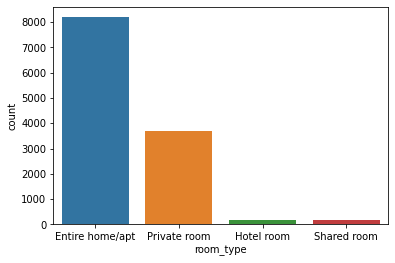

In [ ]:
# Para los graficos categoricos es recomendable un diagrama de barras
#un scatterplot para un cuantitativo con un categorico
#Gráfico de Barras, cuando la data ya esta depurada la visualización se realizará con seaborn(sns)
sns.countplot(data=df2, x="room_type")#cuenta con data set creados es la mejor libreria para la parte de visualización

In [ ]:
#Se puede cambiar el tamaño de las figuras
sns.set(rc={"figure.figsize":(10, 8)})

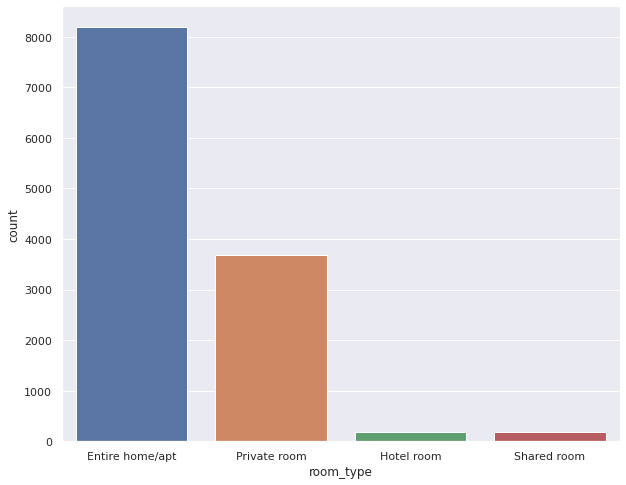

In [ ]:
#Volver a graficar
sns.countplot(data=df2, x="room_type")#el eje x es categorico y el eje y cuantas incidencias hay por esa categoria

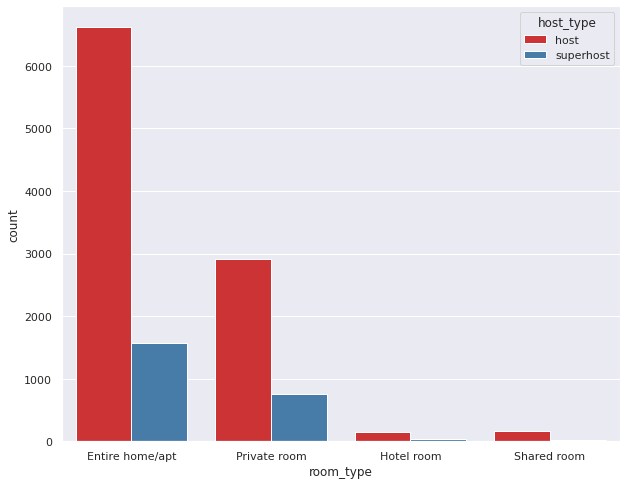

In [ ]:
#Agregar al gráfico un dato "categorico"
sns.countplot(data=df2, x='room_type', hue = 'host_type', palette = "Set1")#hue es el parametro solo se utiliza con datos categoricos

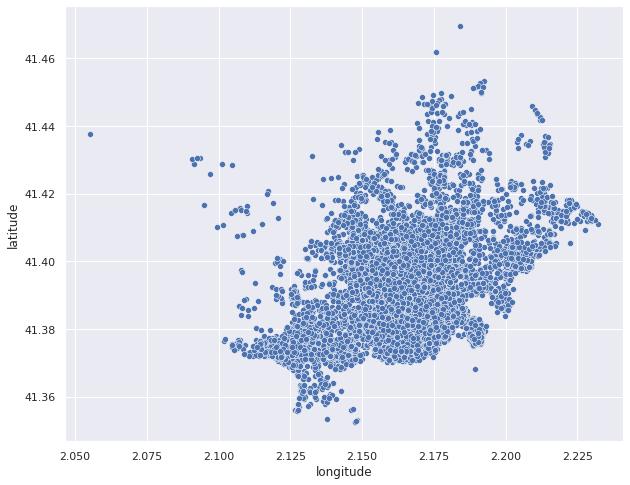

In [ ]:
#Usar un scatterplot(es un grafico de dispersión) en base a su ubicación X=lingitud, Y=latitud
sns.scatterplot(data=df2, x= 'longitude', y = 'latitude')

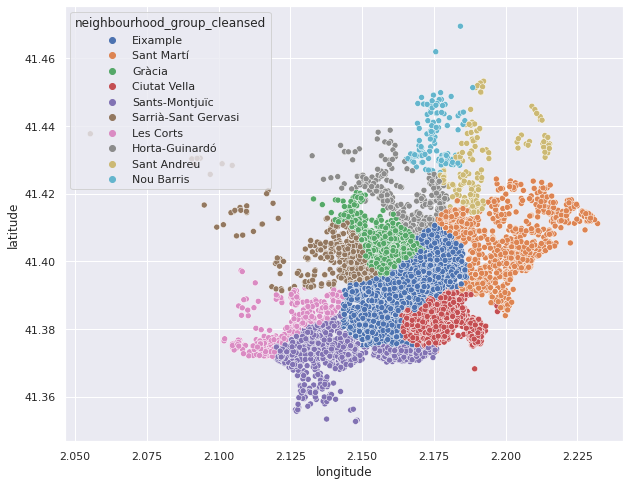

In [ ]:
# Utilizamos el dato de ubicación
sns.scatterplot(data=df2, x= 'longitude', y = 'latitude', hue="neighbourhood_group_cleansed")#es un analisis multivariado mas de dos
#hue="room_type",hue= "neighbourhood_group_cleansed", el hue es un variable categorica


### ***Análisis de Precios***

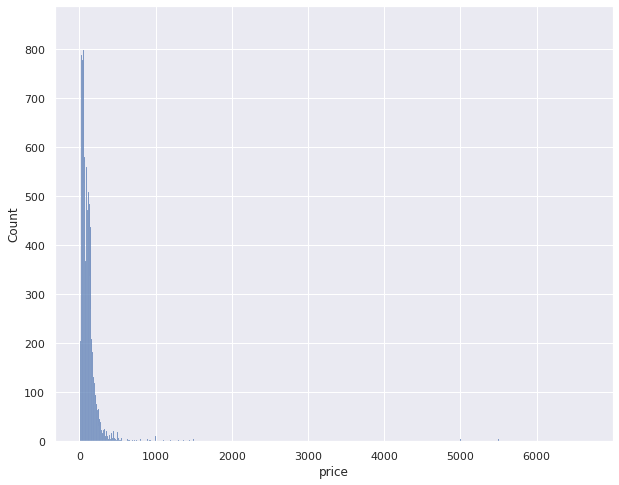

In [ ]:
# Para un cuantitativo o numerico por excelencia es el el histograma
#Utilizar un histograma para un dato cuantitativo
sns.histplot(data=df2, x="price")

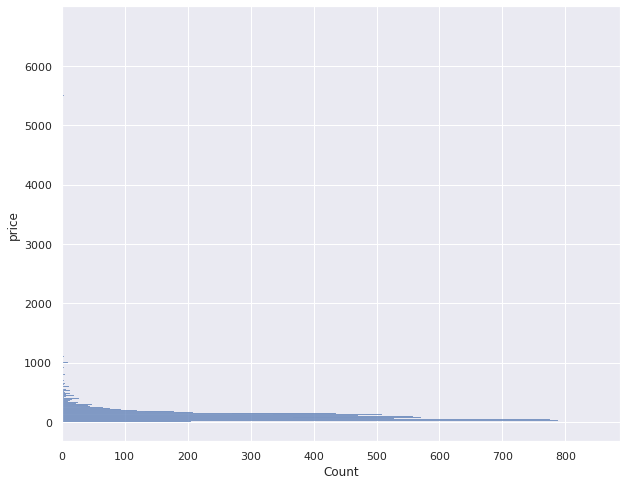

In [ ]:
#Cambiar la orientación
sns.histplot(data=df2, y="price")

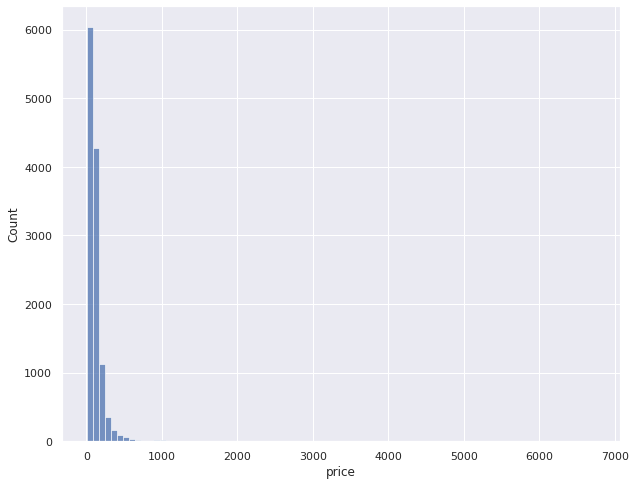

In [ ]:
#Cambiar el tamaño de los bins
sns.histplot(data=df2, x="price", binwidth=80)#cada barrta es un bin

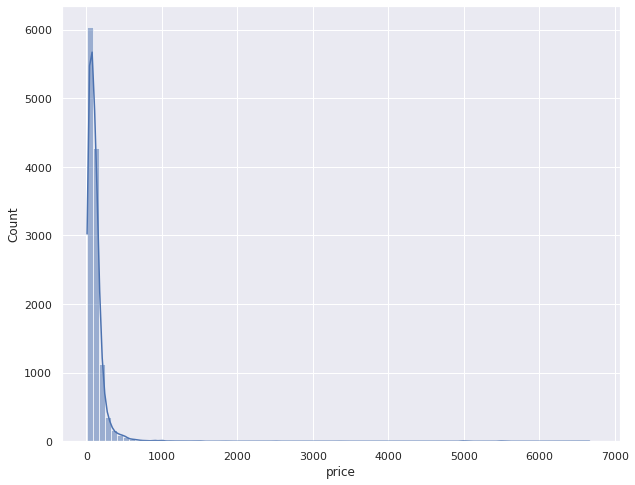

In [ ]:
#se puede agregar la forma de la distribución
sns.histplot(data=df2, x="price", binwidth=80, kde=True)#kde es la linea

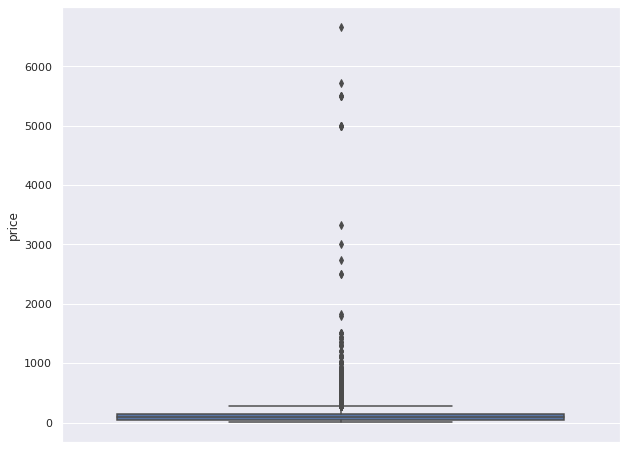

In [ ]:
#Se puede utilizar un diagrama de caja
sns.boxplot(data=df2, y="price")

In [ ]:
df2.describe()

,id,host_id,host_acceptance_rate,latitude,longitude,accommodates,price,number_of_reviews,response_category
count,1.223700e+04,1.223700e+04,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000
mean,1.765927e+16,1.250880e+08,85.145542,41.391598,2.166140,3.823078,118.428046,44.172019,1.542453
std,9.774455e+16,1.353762e+08,24.117462,0.014175,0.019078,2.348341,202.111148,77.846460,0.868861
min,1.867400e+04,1.070400e+04,0.000000,41.352608,2.055280,1.000000,9.000000,0.000000,1.000000
25%,1.673067e+07,6.544866e+06,82.000000,41.380600,2.156350,2.000000,48.000000,1.000000,1.000000
50%,3.365576e+07,5.523797e+07,97.000000,41.389850,2.167530,4.000000,89.000000,9.000000,1.000000
75%,4.646891e+07,2.268047e+08,100.000000,41.401080,2.176924,5.000000,139.000000,53.000000,2.000000
max,5.781858e+17,4.470719e+08,100.000000,41.469480,2.232090,16.000000,6666.000000,960.000000,4.000000


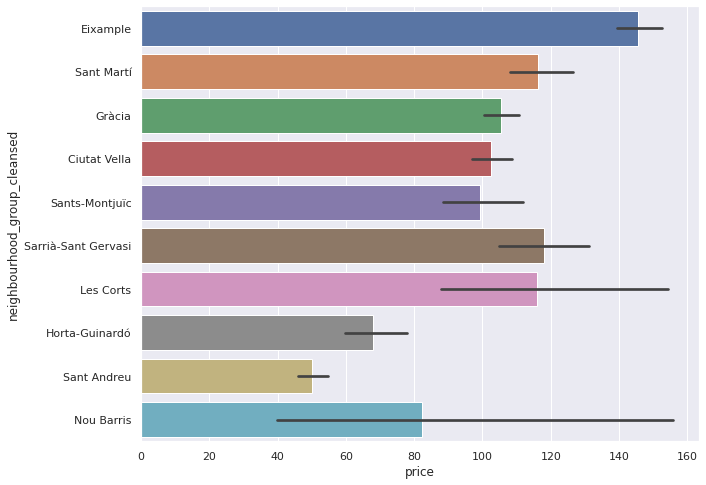

In [ ]:
#Se puede analizar varias variables, el barplot podria analizar un cuantitativo y un categorico
sns.barplot(data=df2, x= 'price', y= 'neighbourhood_group_cleansed')

### ***Uso de Mapas***

In [ ]:
# Importar librería Folium, es una libreria de mapas
import folium

***Barcelona:***

Latitud: 41.3879, Longitud: 2.16992

In [ ]:
#Crea Mapa
map = folium.Map(location=[41.3879, 2.16992], zoom_start=12)
map

Ubicar en el mapa de los 100 lugares con mayores comentarios

In [ ]:
#Subdataframe en base a una condición, usamos la columna number_of_reviews
subdata = df2.sort_values(by=['number_of_reviews'],ascending=False).head(100)
len(subdata)

In [ ]:
subdata

In [ ]:
#Crear tuplas: (latitude, longitude)
listTuplas = zip(subdata['latitude'],subdata['longitude'], subdata['room_type'])

In [ ]:
#Crear marcadores sobre el mapa en base a latitude y longitude
for lat, lon, rt in listTuplas:
  marker = folium.Marker(location=[lat, lon], popup=rt)
  marker.add_to(map)

In [ ]:
map